# Visualización de datos en Twitter




En esta libreta reviso algunos datos accesibles a través del API de twitter. La intención es describir y vizualizar el comportamiento de ciertas variables, como el número de seguidores y seguidos.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns
import tweepy
import time
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
api_key = 'aZpJfdtzxNi4U7CE5T7xXMIHg'
secret = 'x0DDlOMdXYeZU8QJZ2YrmnSHWnzBv8IIOM6h7v4AjmQRUOPsX2'
token = '964985469086859265-NcJcEUVQlfc34r2gvLcuyG8o2fti5SB'
token_secret = 'hO1cXLqJtVtFht3LH3bkgUxiDOo4DYOelPw4wmQ7F0M7B'

In [3]:
auth = tweepy.OAuthHandler(api_key, secret)
auth.set_access_token(token, token_secret)

api = tweepy.API(auth)

In [4]:
# Función para recuperar los datos del API de tuiter. Abajo la escribo parte por parte.

def tweet_miner(last_id):

    while True:
        try:
            tweets = api.search(count=100,geocode='25.730220,-99.813152,22km',max_id=last_id)
            break
        except tweepy.TweepError:
            time.sleep(60 * 5)
            continue
        
    next_request = True
    while next_request is True:
        last_id = tweets[-1].id_str
        try:
            new_search = api.search(count=100,geocode='25.730220,-99.813152,22km',max_id=last_id)
        except tweepy.TweepError:
            next_request = False
        for tweet in new_search:
            tweets.append(tweet)
    
    array = np.array([])
    for tweet in tweets:
        user = tweet.user
        l = [user.name, user.screen_name, user.statuses_count, user.followers_count, user.friends_count]
        array = np.append(array, l)
    
    array = np.reshape(array, (len(tweets), 5))
    
    cols = ['name', 'username', 'tweets', 'followers', 'following']
    df_tweets = pd.DataFrame(array, columns = cols)
    
    last_id = tweets[-1].id_str
    
    return df_tweets, last_id

In [5]:
# Las siguientes celdas sirven para mostrar cómo trabaja la fuinción tweet_miner()

tweets = api.search(count=100,geocode='25.730220,-99.813152,22km')
next_request = True

while next_request is True:
    last_id = tweets[-1].id_str
    try:
        new_search = api.search(count=100,geocode='25.730220,-99.813152,22km',max_id=last_id)
    except tweepy.TweepError:
        next_request = False
    for tweet in new_search:
        tweets.append(tweet)

In [6]:
len(tweets)

17506

In [7]:
dir(tweets[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'parse',
 'parse_list',
 'place',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [8]:
dir(tweet.user)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'contributors_enabled',
 'created_at',
 'default_profile',
 'default_profile_image',
 'description',
 'entities',
 'favourites_count',
 'follow',
 'follow_request_sent',
 'followers',
 'followers_count',
 'followers_ids',
 'following',
 'friends',
 'friends_count',
 'geo_enabled',
 'has_extended_profile',
 'id',
 'id_str',
 'is_translation_enabled',
 'is_translator',
 'lang',
 'listed_count',
 'lists',
 'lists_memberships',
 'lists_subscriptions',
 'location',
 'name',
 'notifications',
 'parse',
 'parse_list',
 'profile_background_color',
 'profile_background_image_url',
 'profile_back

In [9]:
array = np.array([])

for tweet in tweets:
    user = tweet.user
    l = [user.name, user.screen_name, user.statuses_count, user.followers_count, user.friends_count]
    array = np.append(array, l)

In [10]:
array.shape

(90245,)

In [11]:
array = np.reshape(array, (len(tweets), 5))

In [12]:
cols = ['name', 'username', 'tweets', 'followers', 'following']

df_tweets = pd.DataFrame(array, columns = cols)
df_tweets.head()

,name,username,tweets,followers,following
0,Montserrat,montserrat2302,48570,845,316
1,Malibu & Mr (+18),MalibuyMr,4850,14963,408
2,Marian,itsmarian_lara,9298,292,453
3,Cantú⚜️,Alexcantu82,734,142,194
4,Aranza Martinez,yailynaranza1,2752,93,67


In [13]:
df_tweets = df_tweets.drop_duplicates('username', 'first')
df_tweets.reset_index(drop=True)
df_tweets

,name,username,tweets,followers,following
0,Montserrat,montserrat2302,48570,845,316
1,Malibu & Mr (+18),MalibuyMr,4850,14963,408
2,Marian,itsmarian_lara,9298,292,453
3,Cantú⚜️,Alexcantu82,734,142,194
4,Aranza Martinez,yailynaranza1,2752,93,67
5,Ana Itzel,AnaItzelMendoza,7152,231,242
6,Gyo Sandoval,gyogzz,3725,309,336
7,✌🏼💗,yarebenavides_,571,64,71
9,armandosilva,kagamihiiragi17,2883,440,4989
10,Sayle♡,SayleAvalos6,3575,390,379


In [14]:
# Ahora sí llamamos la función que había escrita antes para obtener los siguientes tuits. 

last_id = tweets[-1].id_str
df_tweets2, last_id = tweet_miner(last_id)

In [15]:
df_tweets = df_tweets.append(df_tweets2, ignore_index = True)
df_tweets = df_tweets.drop_duplicates('username', 'first')
df_tweets.reset_index(drop=True)
del df_tweets2

df_tweets

,name,username,tweets,followers,following
0,Montserrat,montserrat2302,48570,845,316
1,Malibu & Mr (+18),MalibuyMr,4850,14963,408
2,Marian,itsmarian_lara,9298,292,453
3,Cantú⚜️,Alexcantu82,734,142,194
4,Aranza Martinez,yailynaranza1,2752,93,67
5,Ana Itzel,AnaItzelMendoza,7152,231,242
6,Gyo Sandoval,gyogzz,3725,309,336
7,✌🏼💗,yarebenavides_,571,64,71
8,armandosilva,kagamihiiragi17,2883,440,4989
9,Sayle♡,SayleAvalos6,3575,390,379


In [16]:
df_tweets.dtypes

name         object
username     object
tweets       object
followers    object
following    object
dtype: object

In [17]:
df_tweets.tweets = df_tweets.tweets.astype(int)
df_tweets.followers = df_tweets.followers.astype(int)
df_tweets.following = df_tweets.following.astype(int)

df_tweets.dtypes

name         object
username     object
tweets        int32
followers     int32
following     int32
dtype: object

### Descripción y vizualización de datos

In [18]:
# Primero que nada podemos ver los valores más básicos de la estadística descriptiva 

df_tweets.describe()

,tweets,followers,following
count,1.522600e+04,15226.000000,15226.000000
mean,1.382722e+04,925.890910,554.054512
std,2.471741e+04,8920.482386,2016.699962
min,1.000000e+00,0.000000,0.000000
25%,1.617500e+03,117.000000,170.000000
50%,6.328500e+03,277.000000,305.000000
75%,1.706400e+04,552.000000,550.000000
max,1.035346e+06,727968.000000,132673.000000


Aquí me llaman la atención dos cosas: primeramente, la media de los seguidores de un usuario se me hace un dato demasiado elevado; en mi experiencia personal no creo que este número representen realmente a un usuario común. El otro punto interesante es que la desviación estándar de los seguidores es mucho más elevada que la media (casi diez veces mayor). Dado que los seguidores de un usuario no pueden, evidentemente, ser menores a cero, esto me sugiere de entrada que existen usuarios con un número de seguidores bastante elevado que inflan tanto la media como la desviación. De ser así, deberíamos de ver un sesgo y una curtósis positiva y elevada en los datos de la muestra; demostraría que la mayor parte de los usuarios se concentran cargados hacia la izquierda, con unos cuántos usuarios _tuitstars_ con un número de seguidores bastante alto.

In [19]:
print(df_tweets.followers.mean()) 
print(df_tweets.followers.std())

925.8909102850388
8920.482386478585


In [20]:
print(df_tweets.followers.skew()) # Sesgo de los seguidores
print(df_tweets.followers.kurtosis()) # Curtósis de los seguidores

52.0963084971522
3638.65676629769


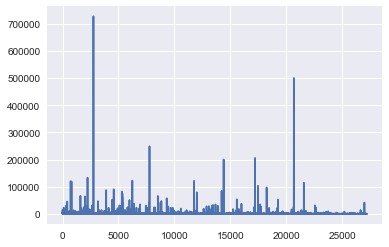

In [21]:
# En el gráfico se pueden ver los usuarios con un número bastante alto de seguidores que inflan la media y la desviación

df_tweets.followers.plot()

In [22]:
# Si limpio los datos para mantener solamente los usuarios que no excedan los 8,000 seguidores,
# me encuentro con una mejor imagen de los usuarios comunes.

df_tweets = df_tweets[df_tweets.followers < 8000]
df_tweets

,name,username,tweets,followers,following
0,Montserrat,montserrat2302,48570,845,316
2,Marian,itsmarian_lara,9298,292,453
3,Cantú⚜️,Alexcantu82,734,142,194
4,Aranza Martinez,yailynaranza1,2752,93,67
5,Ana Itzel,AnaItzelMendoza,7152,231,242
6,Gyo Sandoval,gyogzz,3725,309,336
7,✌🏼💗,yarebenavides_,571,64,71
8,armandosilva,kagamihiiragi17,2883,440,4989
9,Sayle♡,SayleAvalos6,3575,390,379
10,La Vampira,winislob,16248,1680,521


Ya filtrados los _tuitstars_ podemos ver datos más representativos del usuario común. Tanto la desviación estándar como el sesgo y la curtósis disminuyeron bastante. También en el gráfico podemos ver que los datos ya se encuentran más nivelados, con menos eventos extraordinarios como lo son los _tuitstars_.

In [23]:
print(df_tweets.followers.mean())
print(df_tweets.followers.std())

461.2134219269103
674.9796795787955


In [24]:
print(df_tweets.followers.skew())
print(df_tweets.followers.kurtosis())

4.626426785557628
30.204084059354685


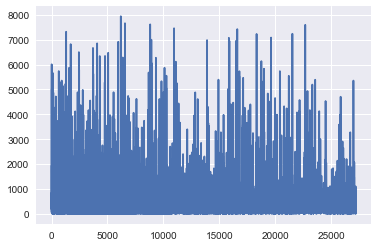

In [25]:
df_tweets.followers.plot()

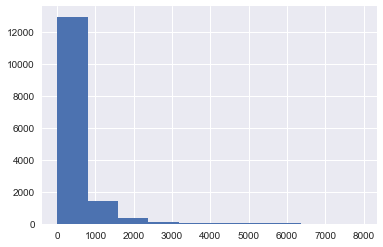

In [26]:
df_tweets.followers.hist()

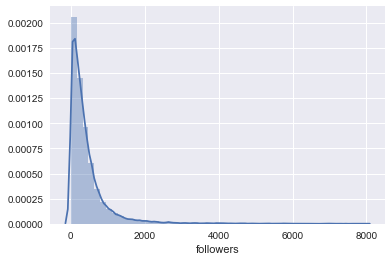

In [27]:
# La forma de la de función de densidad de probabilidad coincide con el sesgo y la curtósis que habíamos visto antes. 

sns.distplot(df_tweets.followers)

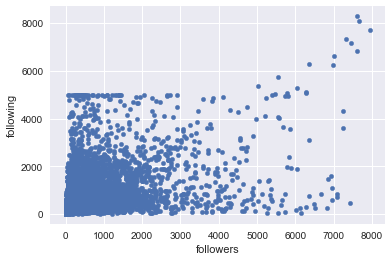

In [28]:
# correlación entre seguidores y seguidos

df_tweets.plot(kind = 'scatter', x = 'followers', y = 'following')

In [34]:
df_tweets.followers.corr(df_tweets.following)

0.48188040398442405

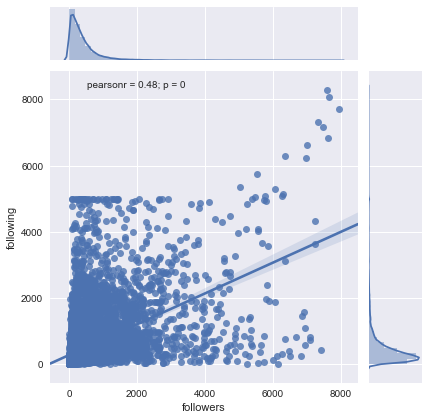

In [33]:
sns.jointplot(x = 'followers', y = 'following', data = df_tweets[['followers', 'following']], kind = 'reg')

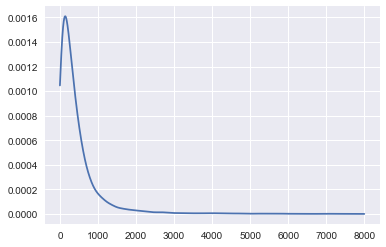

In [31]:
# estimación de la función de densidad de probabilidad de los seguidores de un usuario

dist = stats.gaussian_kde(df_tweets.followers)
x_axis = np.arange(0, 8000, 1)
plt.plot(x_axis, dist.pdf(x_axis))

In [35]:
# probabilidad de que un usuario tenga entre 0 y 400 seguidores

dist.integrate_box_1d(0,400)

0.5447928481921496